In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/online-retail-dataset.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
421953,573033,20868,SILVER FABRIC MIRROR,14,10/27/2011 13:41,0.39,14099.0,United Kingdom
421954,573033,20869,GOLD FABRIC MIRROR,12,10/27/2011 13:41,0.39,14099.0,United Kingdom
421955,573033,22999,TRAVEL CARD WALLET VINTAGE LEAF,24,10/27/2011 13:41,0.42,14099.0,United Kingdom
421956,573033,23503,PLAYING CARDS KEEP CALM & CARRY ON,4,10/27/2011 13:41,1.25,14099.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421958 entries, 0 to 421957
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    421958 non-null  object 
 1   StockCode    421958 non-null  object 
 2   Description  420599 non-null  object 
 3   Quantity     421958 non-null  int64  
 4   InvoiceDate  421958 non-null  object 
 5   UnitPrice    421957 non-null  float64
 6   CustomerID   315863 non-null  float64
 7   Country      421957 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,421958.000000,421957.000000,315863.000000
mean,9.828419,4.689637,15276.733897
std,170.849464,101.425033,1713.649345
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13895.000000
50%,3.000000,2.100000,15146.000000
75%,11.000000,4.130000,16778.000000
max,74215.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1359
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,106095
Country,1


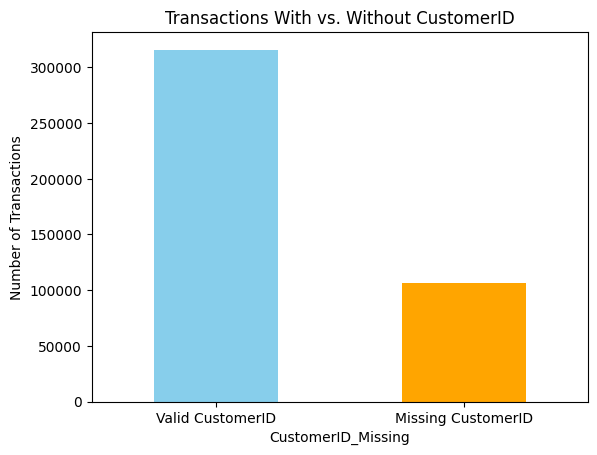

In [9]:
import matplotlib.pyplot as plt
df['CustomerID_Missing']=df['CustomerID'].isna()
# Plot the number of transactions with and without CustomerID
df['CustomerID_Missing'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Transactions With vs. Without CustomerID')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Valid CustomerID', 'Missing CustomerID'], rotation=0)
plt.show()

In [10]:
missing_customer_data = df[df['CustomerID'].isna()]

# Check the proportion of missing CustomerID for each country
missing_by_country = missing_customer_data['Country'].value_counts(normalize=True)
print("\nProportion of Missing CustomerID by Country:")
print(missing_by_country)


Proportion of Missing CustomerID by Country:
Country
United Kingdom    0.988491
EIRE              0.005995
Hong Kong         0.002630
Unspecified       0.001404
Switzerland       0.000490
Israel            0.000443
Portugal          0.000368
France            0.000160
Bahrain           0.000019
Name: proportion, dtype: float64


In [11]:
df['Description'] = df['Description'].fillna('Unknown')

# Fill missing CustomerID with a placeholder (-1)
df['CustomerID'] = df['CustomerID'].fillna(-1)

# Optionally create a flag for missing CustomerID
df['CustomerID_Missing'] = df['CustomerID'].isnull()

# Check the dataset after handling missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             1
CustomerID            0
Country               1
CustomerID_Missing    0
dtype: int64


In [12]:
data_cleaned = df.dropna()

In [15]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Missing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
421952,573033,21754,HOME BUILDING BLOCK WORD,2,10/27/2011 13:41,6.25,14099.0,United Kingdom,False
421953,573033,20868,SILVER FABRIC MIRROR,14,10/27/2011 13:41,0.39,14099.0,United Kingdom,False
421954,573033,20869,GOLD FABRIC MIRROR,12,10/27/2011 13:41,0.39,14099.0,United Kingdom,False
421955,573033,22999,TRAVEL CARD WALLET VINTAGE LEAF,24,10/27/2011 13:41,0.42,14099.0,United Kingdom,False


In [16]:
print("\nData Summary:")
print(data_cleaned.describe())


Data Summary:
            Quantity      UnitPrice     CustomerID
count  421957.000000  421957.000000  421957.000000
mean        9.828433       4.689637   11435.404330
std       170.849666     101.425033    6791.858161
min    -74215.000000  -11062.060000      -1.000000
25%         1.000000       1.250000      -1.000000
50%         3.000000       2.100000   14356.000000
75%        11.000000       4.130000   16232.000000
max     74215.000000   38970.000000   18287.000000


In [17]:
top_products = (
    data_cleaned.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\nTop 5 Selling Products:")
print(top_products)


Top 5 Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     47811
JUMBO BAG RED RETROSPOT               40287
PACK OF 72 RETROSPOT CAKE CASES       32529
ASSORTED COLOUR BIRD ORNAMENT         29348
WHITE HANGING HEART T-LIGHT HOLDER    29151
Name: Quantity, dtype: int64


In [18]:
data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
sales_by_country = (
    data_cleaned.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
)
print("\nTotal Sales by Country:")
print(sales_by_country)


Total Sales by Country:
Country
United Kingdom          6392621.584
Netherlands              247077.510
EIRE                     224442.160
Germany                  185674.090
France                   149703.580
Australia                130271.280
Switzerland               47858.400
Spain                     43792.830
Sweden                    33529.000
Belgium                   32011.050
Japan                     26997.470
Portugal                  23920.170
Norway                    23052.540
Channel Islands           18396.970
Finland                   17930.920
Denmark                   15899.670
Cyprus                    12576.650
Italy                     11785.490
Hong Kong                  9805.940
Singapore                  9120.390
Austria                    8141.340
Israel                     7907.820
Poland                     5871.270
Greece                     4029.530
Unspecified                3784.040
Canada                     3666.380
Iceland                    2790

<ipython-input-18-0d24154fd0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']


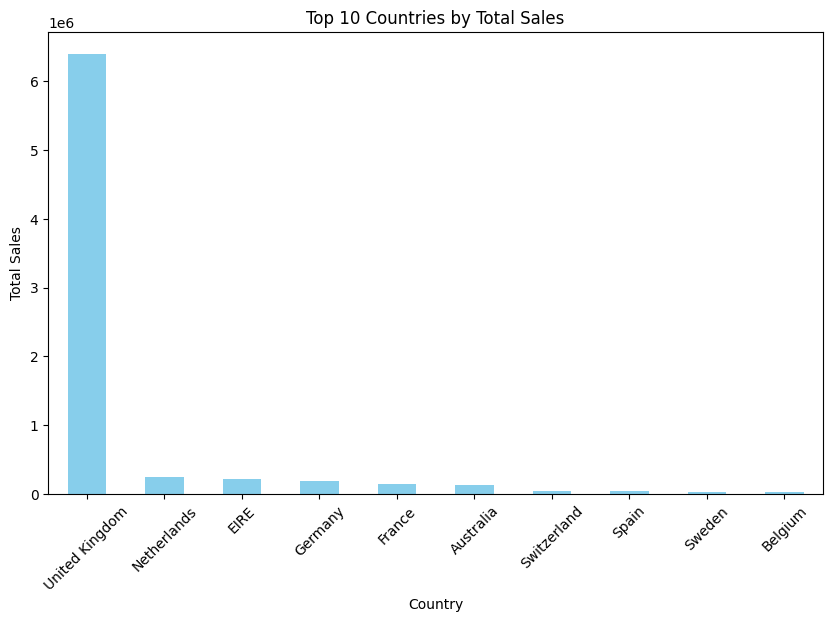

In [19]:
import matplotlib.pyplot as plt

# Plotting the top 10 countries by sales
top_countries = sales_by_country.head(10)
top_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# New Section